# Happiness is a Regression Model

## Eyeballing the data
We want to check if there are obvious relationships between happiness and the following features:
- Economy (GDP per capita)
- Family
- Health (Life Expectancy)
- Freedom
- Trust (Government Corruption)

In [10]:
import pandas as pd 

report = pd.read_csv('/Users/WoodPecker/PycharmProjects/JupyterProject/happiness-report-2016.csv', header=0)

In [11]:
import numpy as np

happiness = report.iloc[:,3].values 
economy = report.iloc[:,6].values
family = report.iloc[:,7].values
health = report.iloc[:,8].values
freedom = report.iloc[:,9].values
trust = report.iloc[:,10].values

In [12]:
import matplotlib.pyplot as plt
from sklearn import linear_model

reg = linear_model.LinearRegression()

def process(x, y, x_label, y_label):
    plt.scatter(x, y, color='blue', marker='x')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
    X = []
    for ele in x:
        X.append([ele])
    reg.fit(X,y)
    print("wo = ", reg.intercept_) 
    print("w1 = ", reg.coef_[0])
    print("Correlation Coefficient = " , np.corrcoef(reg.predict(X), y)[0])
    print("MSE = ", sum((reg.predict(X) - y)**2) / len(y))
    
    plt.scatter(x, y, color='blue', marker='x')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x, reg.predict(X), color='red', linewidth=2)
    plt.show()
    

## Graph for the Economy

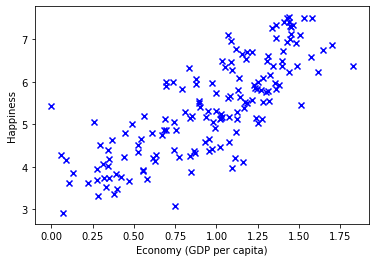

wo =  3.296180041308007
w1 =  2.186863221725732
Correlation Coefficient =  [1.         0.79032202]
MSE =  0.4861751800515043


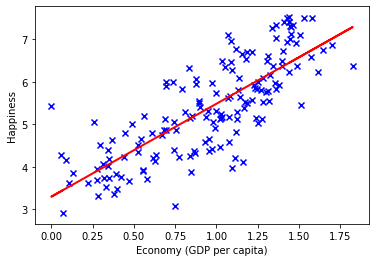

In [13]:
process(economy, happiness, 'Economy (GDP per capita)', 'Happiness')

## Graph for the Family

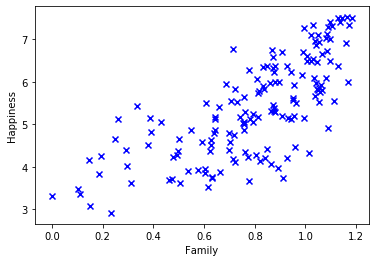

wo =  2.8707897965612656
w1 =  3.1644760594639627
Correlation Coefficient =  [1.         0.73925158]
MSE =  0.587344486251004


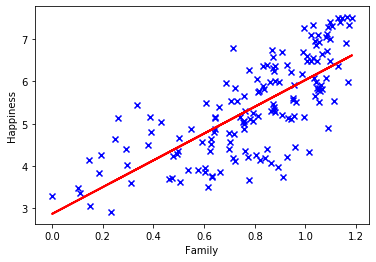

In [14]:
process(family, happiness, 'Family', 'Happiness')


## Graph for the Health

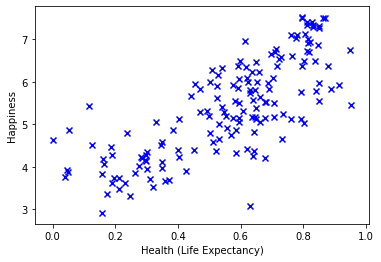

wo =  3.2576597858122227
w1 =  3.8099939212365515
Correlation Coefficient =  [1.         0.76538433]
MSE =  0.5364201409759957


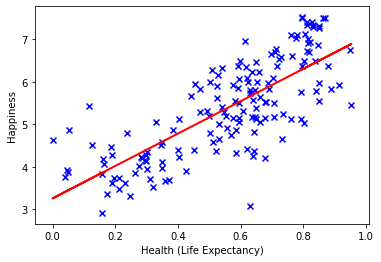

In [15]:
process(health, happiness, 'Health (Life Expectancy)', 'Happiness')

## Graph for the Freedom

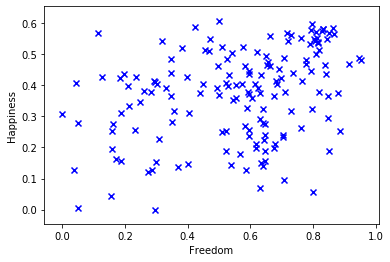

wo =  0.25028711106651624
w1 =  0.21646819498642836
Correlation Coefficient =  [1.         0.34119929]
MSE =  0.018588258571035195


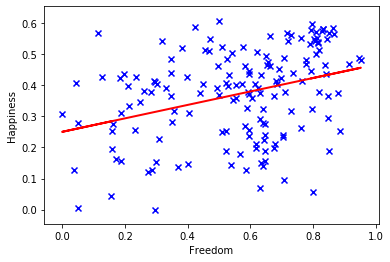

In [16]:
process(health, freedom, 'Freedom', 'Happiness')

## Graph for the Trust

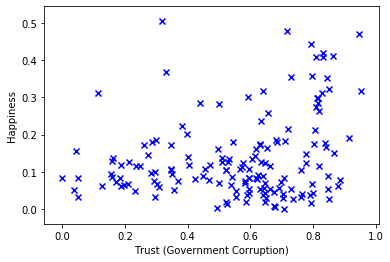

wo =  0.07024436240221602
w1 =  0.1208341140967211
Correlation Coefficient =  [1.         0.24958329]
MSE =  0.011487756168940846


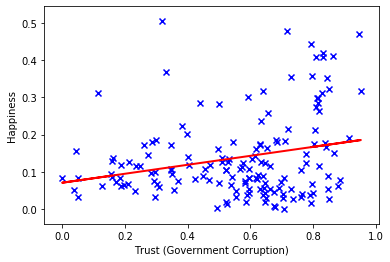

In [17]:
process(health, trust, 'Trust (Government Corruption)', 'Happiness')

## Multiple Linear Regression

Now that we have done five linear regressions for five different features, we want to do one single multiple linear 
regression containing all features and a new feature:
- Region  

Region is a nominal feature that needs to be encoded first.  
The data is randomly split into 80% training and 20% test data.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

enc = OneHotEncoder(handle_unknown='ignore')

allFeat = report.iloc[:,[1,6,7,8,9,10]].values

labelencoder = LabelEncoder()
allFeat[:, 0] = labelencoder.fit_transform(allFeat[:, 0])
onehotencoder = OneHotEncoder()
onehotencoder.fit(allFeat)
x = onehotencoder.transform(allFeat)

X_train, X_test, Y_train, Y_test = train_test_split(allFeat, happiness, test_size=0.2, random_state=0)


reg.fit(X_train, Y_train)
print("wo = ", reg.intercept_) 
print("w1 = ", reg.coef_[0]) #nationality
print("w2 = ", reg.coef_[1]) #economy
print("w3 = ", reg.coef_[2]) #family
print("w4 = ", reg.coef_[3]) #health
print("w5 = ", reg.coef_[4]) #freedom
print("w6 = ", reg.coef_[5]) #trust

print("Correlation Coefficient = " , np.corrcoef(reg.predict(X_train), Y_train)[0])
print("MSE = ", sum((reg.predict(X_test) - Y_test)**2) / len(Y_test))


[-0.00799507  0.68877323  1.17612903  1.4211988   1.77787521  0.80018727]
wo =  2.2782596688471113
w1 =  -0.007995072765417523
w2 =  0.6887732289739432
w3 =  1.176129031550526
w4 =  1.421198804742862
w5 =  1.777875211683762
w6 =  0.8001872694025163
Correlation Coefficient =  [1.         0.89587069]
MSE =  0.2966742611723981
